  #                             **GERMAN CREDIT CASE STUDY**

 **PROBLEM STATEMENT**                     

**Context**

To minimize loss from the bank’s perspective, the bank needs a decision rule regarding whom to approve the loan and whom not to. An applicant’s demographic and socio-economic profiles are considered by loan managers before a decision is taken regarding his/her loan application. In this dataset, each entry represents a person who takes credit from a bank. Each person is classified as a good or bad credit risk according to the set of attributes.

**Objective:**

The objective is to build a predictive model on this data to help the bank decide on whether to approve a loan to a prospective applicant.


**Dataset**

*   Age (Numeric: Age in years)
*   Sex (Categories: male, female)
*   Job (Categories: unskilled and non-resident, unskilled and resident, skilled, highly skilled)
*   Housing (Categories: own, rent, or free)
*   Saving accounts (Categories: little, moderate, quite rich, rich)
*   Checking account (Categories: little, moderate, rich)
*   Credit amount (Numeric: Amount of credit in DM - Deutsche Mark)
*   Duration (Numeric: Duration for which the credit is given in months)
*   Purpose (Categories: car, furniture/equipment,radio/TV, domestic appliances, repairs, education, business, vacation/others)
*   Risk (0 - Person is not at risk, 1 - Person is at risk(defaulter))









**Data Wrangling**

In [5]:
# Load necessary libraries
library(dplyr)
# Load the dataset
data <- read.csv("/content/German_Credit.csv")
data

Age,Sex,Job,Housing,Saving.accounts,Checking.account,Credit.amount,Duration,Risk,Purpose
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>
67,male,skilled,own,little,little,1169,6,0,radio/TV
22,female,skilled,own,little,moderate,5951,48,1,radio/TV
49,male,unskilled_and_non-resident,own,little,little,2096,12,0,education
45,male,skilled,free,little,little,7882,42,0,furniture/equipment
53,male,skilled,free,little,little,4870,24,1,car
35,male,unskilled_and_non-resident,free,little,moderate,9055,36,0,education
53,male,skilled,own,quite rich,moderate,2835,24,0,furniture/equipment
35,male,highly skilled,rent,little,moderate,6948,36,0,car
61,male,unskilled_and_non-resident,own,rich,moderate,3059,12,0,radio/TV


In [6]:
# Check the structure of the dataset
str(data)

'data.frame':	1000 obs. of  10 variables:
 $ Age             : int  67 22 49 45 53 35 53 35 61 28 ...
 $ Sex             : chr  "male" "female" "male" "male" ...
 $ Job             : chr  "skilled" "skilled" "unskilled_and_non-resident" "skilled" ...
 $ Housing         : chr  "own" "own" "own" "free" ...
 $ Saving.accounts : chr  "little" "little" "little" "little" ...
 $ Checking.account: chr  "little" "moderate" "little" "little" ...
 $ Credit.amount   : int  1169 5951 2096 7882 4870 9055 2835 6948 3059 5234 ...
 $ Duration        : int  6 48 12 42 24 36 24 36 12 30 ...
 $ Risk            : int  0 1 0 0 1 0 0 0 0 1 ...
 $ Purpose         : chr  "radio/TV" "radio/TV" "education" "furniture/equipment" ...


In [7]:
# Check for missing values
sum(is.na(data))

[1] 0

In [8]:
# Check for duplicates
data <- distinct(data)


In [9]:
# Explore unique values in each categorical variable
unique_values <- lapply(data[,sapply(data, is.character)], unique)
print(unique_values)

$Sex
[1] "male"   "female"

$Job
[1] "skilled"                    "unskilled_and_non-resident"
[3] "highly skilled"            

$Housing
[1] "own"  "free" "rent"

$Saving.accounts
[1] "little"     "quite rich" "rich"       "moderate"  

$Checking.account
[1] "little"   "moderate" "rich"    

$Purpose
[1] "radio/TV"            "education"           "furniture/equipment"
[4] "car"                 "business"            "domestic appliances"
[7] "repairs"             "vacation/others"    



**Exploratory Data Analysis (EDA)**

In [10]:
# Summary statistics
summary(data)

      Age            Sex                Job              Housing         
 Min.   :19.00   Length:1000        Length:1000        Length:1000       
 1st Qu.:27.00   Class :character   Class :character   Class :character  
 Median :33.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :35.55                                                           
 3rd Qu.:42.00                                                           
 Max.   :75.00                                                           
 Saving.accounts    Checking.account   Credit.amount      Duration   
 Length:1000        Length:1000        Min.   :  250   Min.   : 4.0  
 Class :character   Class :character   1st Qu.: 1366   1st Qu.:12.0  
 Mode  :character   Mode  :character   Median : 2320   Median :18.0  
                                       Mean   : 3271   Mean   :20.9  
                                       3rd Qu.: 3972   3rd Qu.:24.0  
                                       Max.   :18424   Max.   

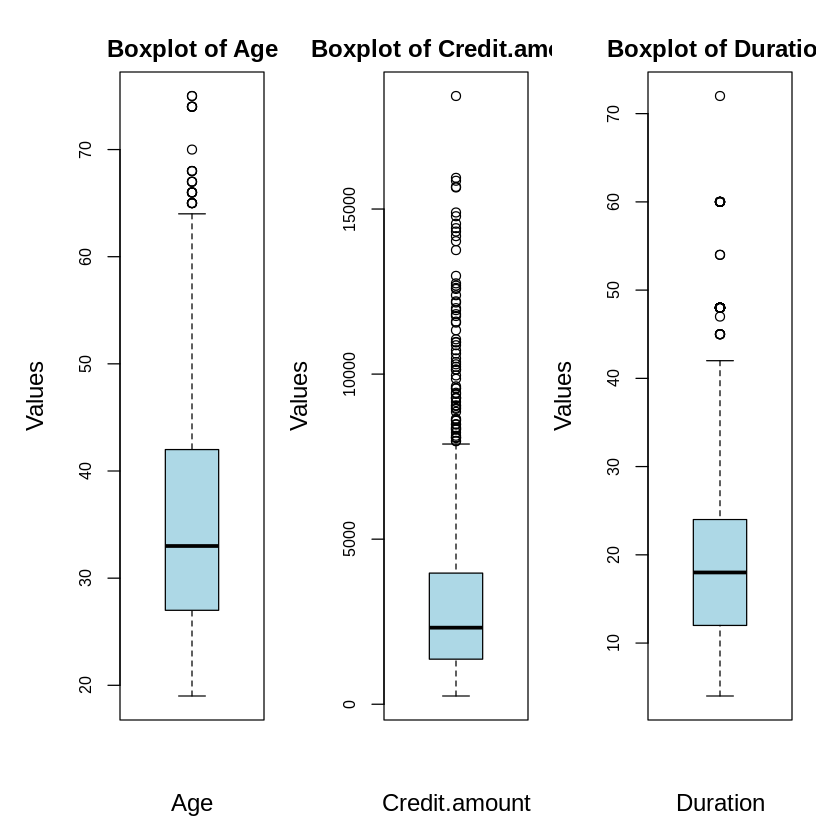

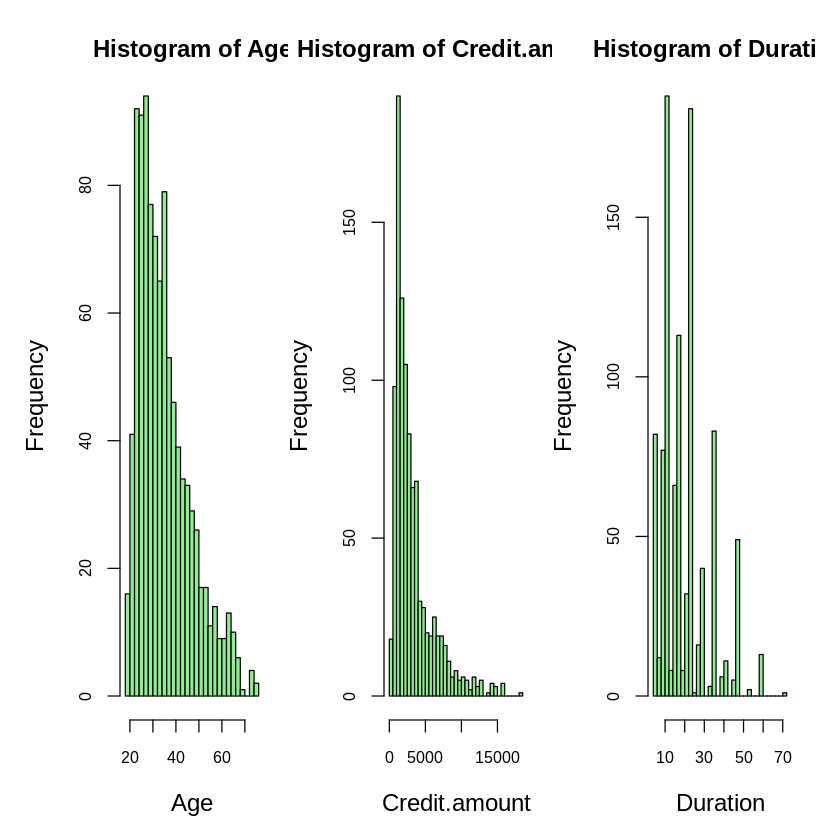

In [11]:
# Load necessary libraries
library(ggplot2)

columns_to_plot <- c("Age", "Credit.amount", "Duration")

# Adjust margins to allow more space for each plot (bottom, left, top, right)
par(mfrow = c(1, 3), mar = c(4, 4, 2, 1), oma = c(1, 1, 1, 1), cex = 1)

# Create Boxplots for the three columns, with adjusted plot margins
for (col in columns_to_plot) {
  # Check for NA values and handle them
  if(all(is.na(data[[col]]))){
    print(paste("Column", col, "has all NA values. Skipping boxplot."))
    plot.new() # Create an empty plot
    title(main = paste("Boxplot of", col))
  } else {
    boxplot(data[[col]],
            main = paste("Boxplot of", col),
            xlab = col,
            ylab = "Values",
            col = "lightblue",
            cex.axis = 0.8,
            cex.lab = 1.2)
  }
}

# Reset margins and plotting area for histograms
par(mfrow = c(1, 3), mar = c(4, 4, 2, 1), oma = c(1, 1, 1, 1), cex = 1)

# Create Histograms for the three columns, with adjusted plot margins
for (col in columns_to_plot) {
  # Check for NA values and handle them
  if(all(is.na(data[[col]]))){
    print(paste("Column", col, "has all NA values. Skipping histogram."))
    plot.new()
    title(main = paste("Histogram of", col)) # Add a title to the empty plot
  } else {
    hist(data[[col]],
         main = paste("Histogram of", col),
         xlab = col,
         ylab = "Frequency",
         col = "lightgreen",
         breaks = 30,
         cex.axis = 0.8,
         cex.lab = 1.2)
  }
}

**UNIVARIATE ANALYSIS**

**Bar Chart Of Categorical Variables**

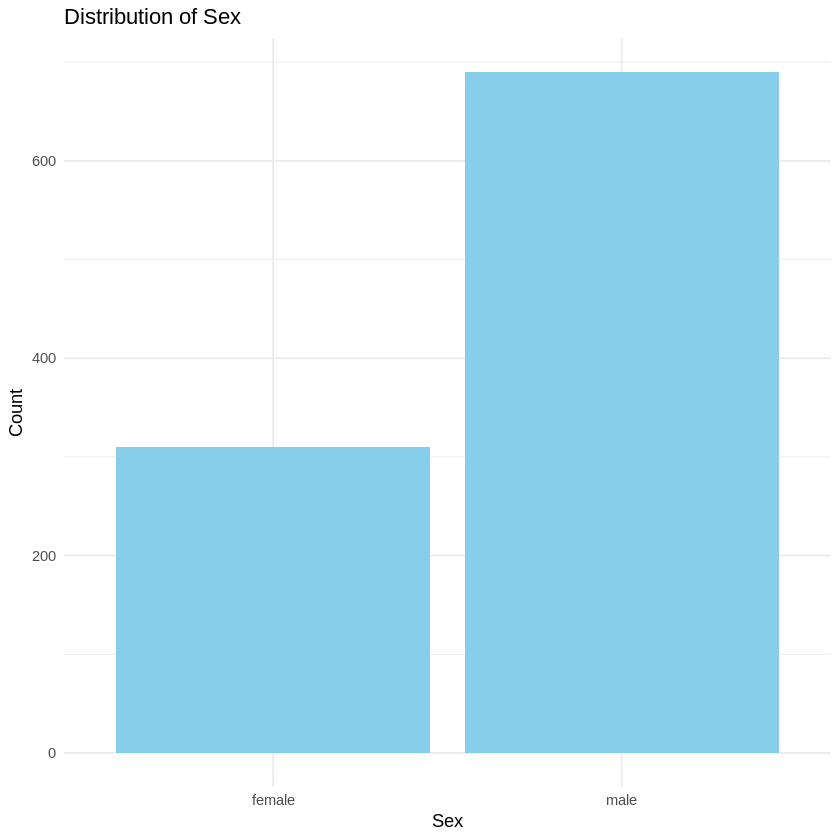

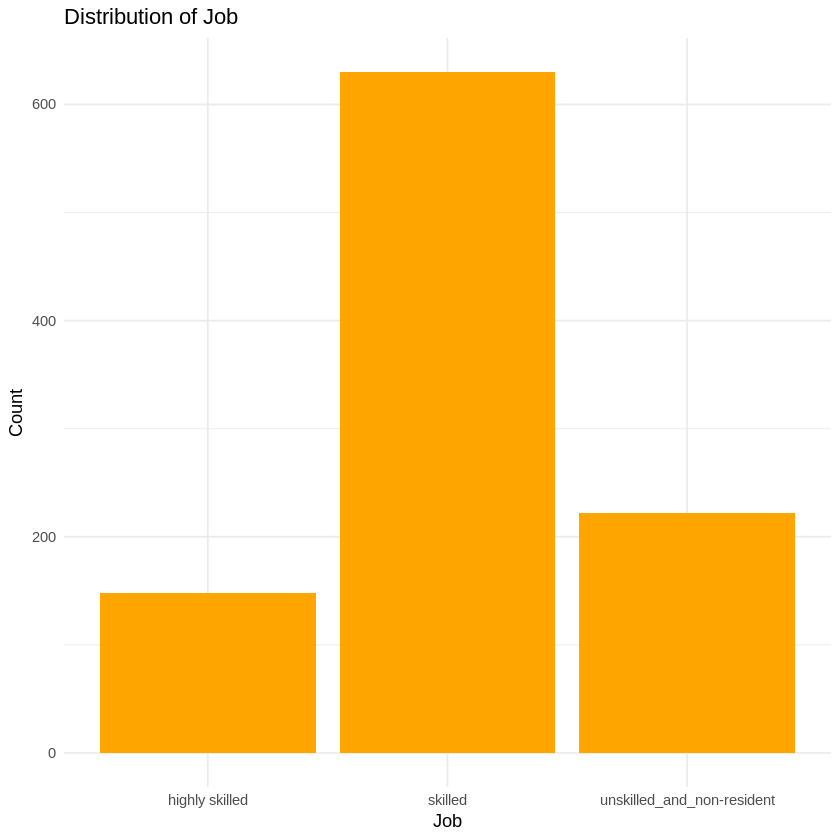

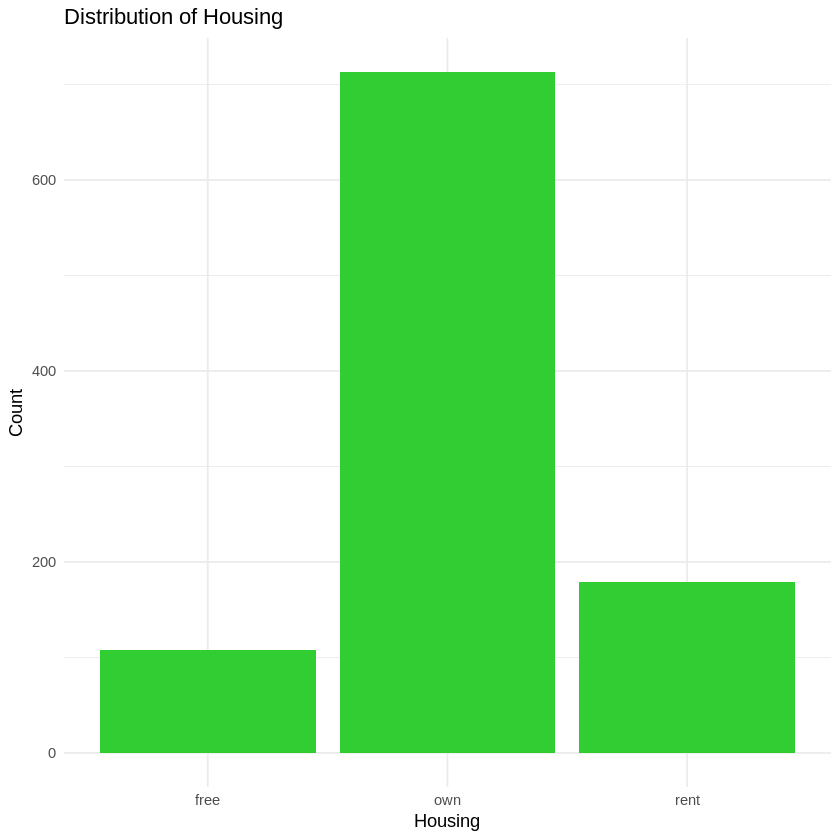

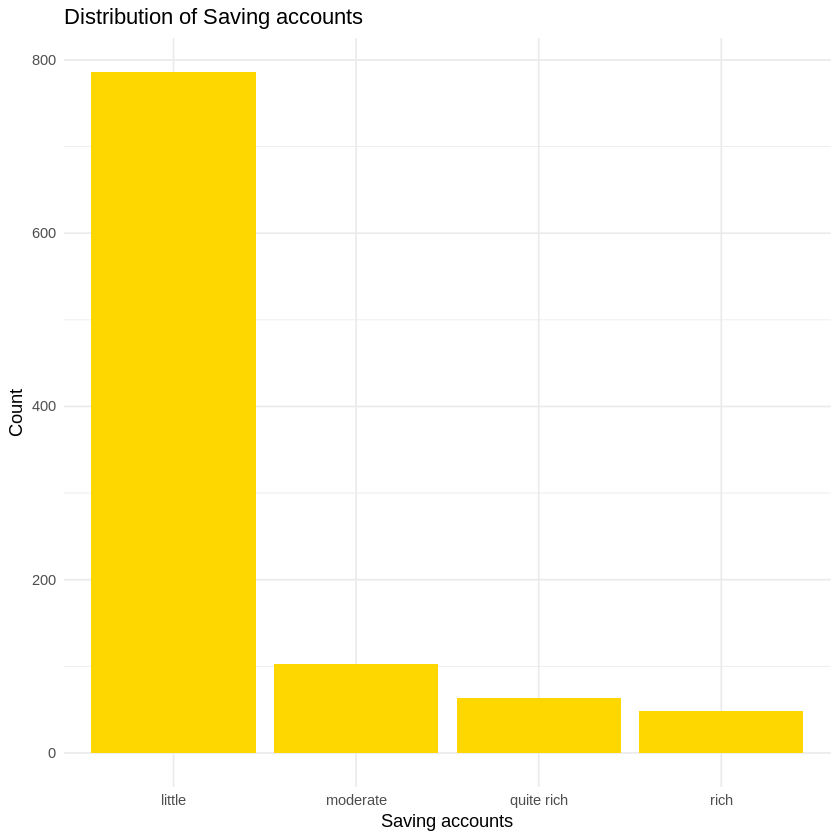

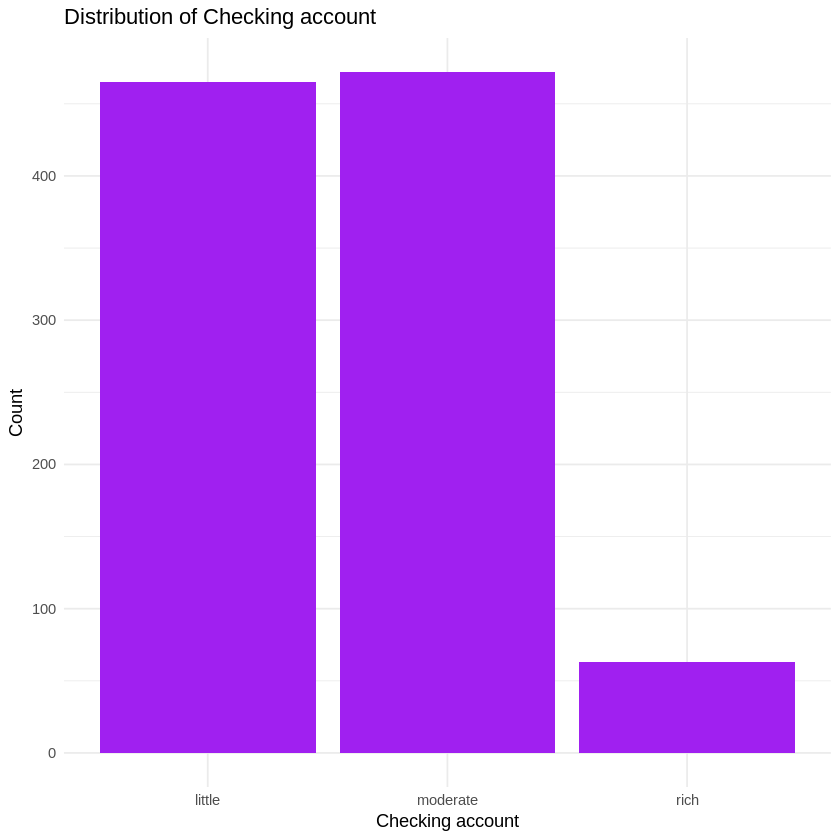

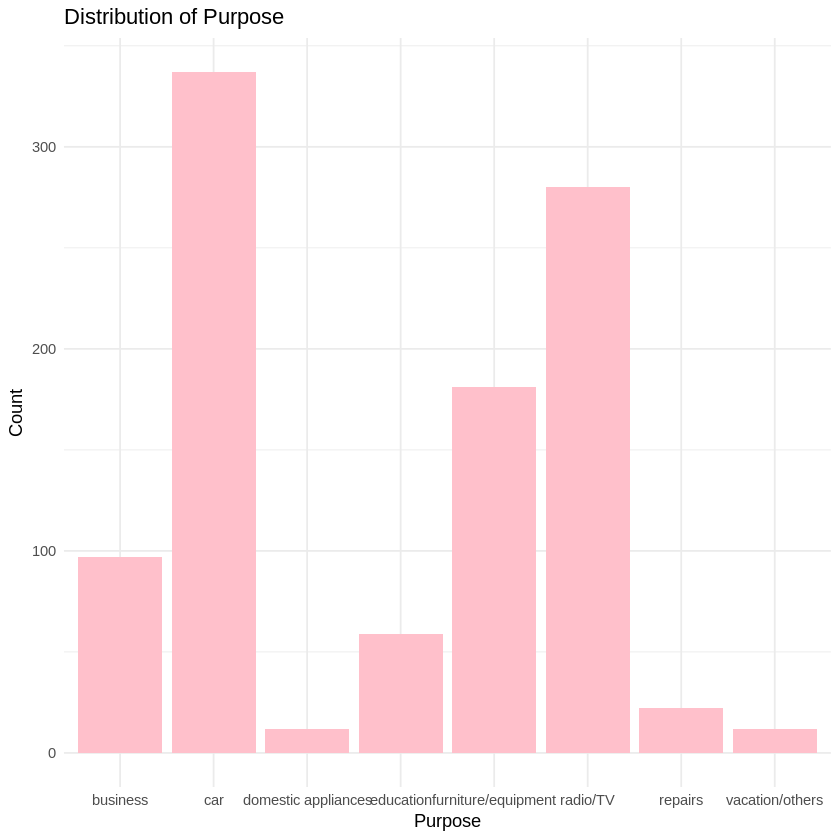

In [12]:
# Load the ggplot2 library
library(ggplot2)


# Plot a bar chart of the categorical variable

ggplot(data, aes(x = Sex)) +
  geom_bar(fill = "skyblue") +
  labs(title = "Distribution of Sex", x = "Sex", y = "Count") +
  theme_minimal()

ggplot(data, aes(x = Job)) +
  geom_bar(fill = "Orange") +
  labs(title = "Distribution of Job", x = "Job", y = "Count") +
  theme_minimal()

ggplot(data, aes(x = Housing)) +
  geom_bar(fill = "Lime Green") +
  labs(title = "Distribution of Housing", x = "Housing", y = "Count") +
  theme_minimal()

ggplot(data, aes(x = Saving.accounts)) +
  geom_bar(fill = "Gold") +
  labs(title = "Distribution of Saving accounts", x = "Saving accounts", y = "Count") +
  theme_minimal()

ggplot(data, aes(x = Checking.account)) +
  geom_bar(fill = "Purple") +
  labs(title = "Distribution of Checking account ", x = "Checking account", y = "Count") +
  theme_minimal()

ggplot(data, aes(x = Purpose)) +
  geom_bar(fill = "Pink") +
  labs(title = "Distribution of Purpose", x = "Purpose", y = "Count") +
  theme_minimal()


**Histogram Of Numerical Variables**

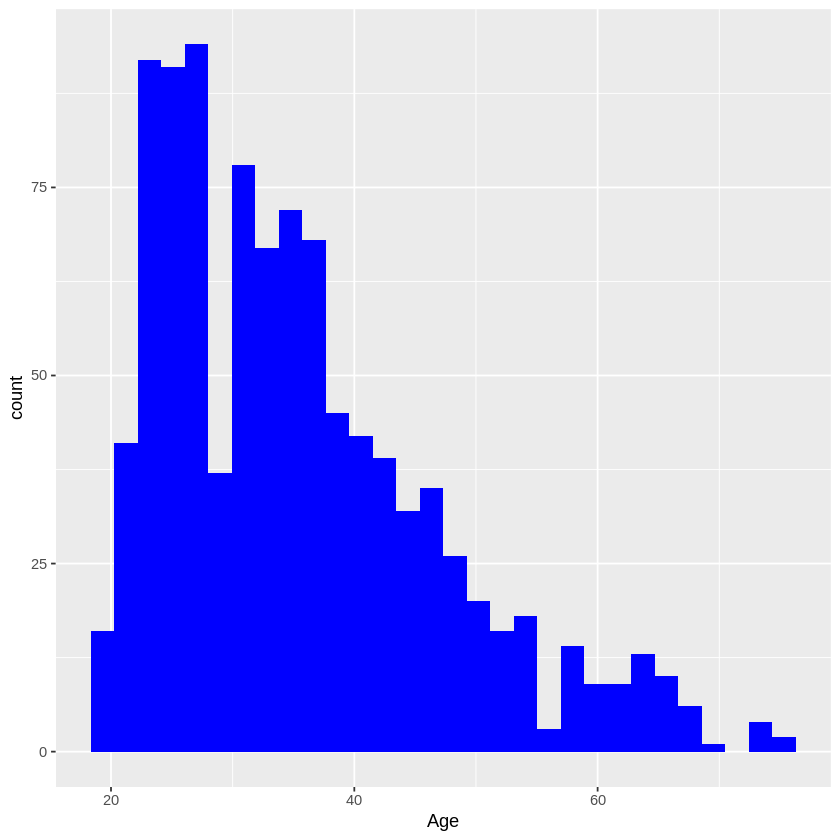

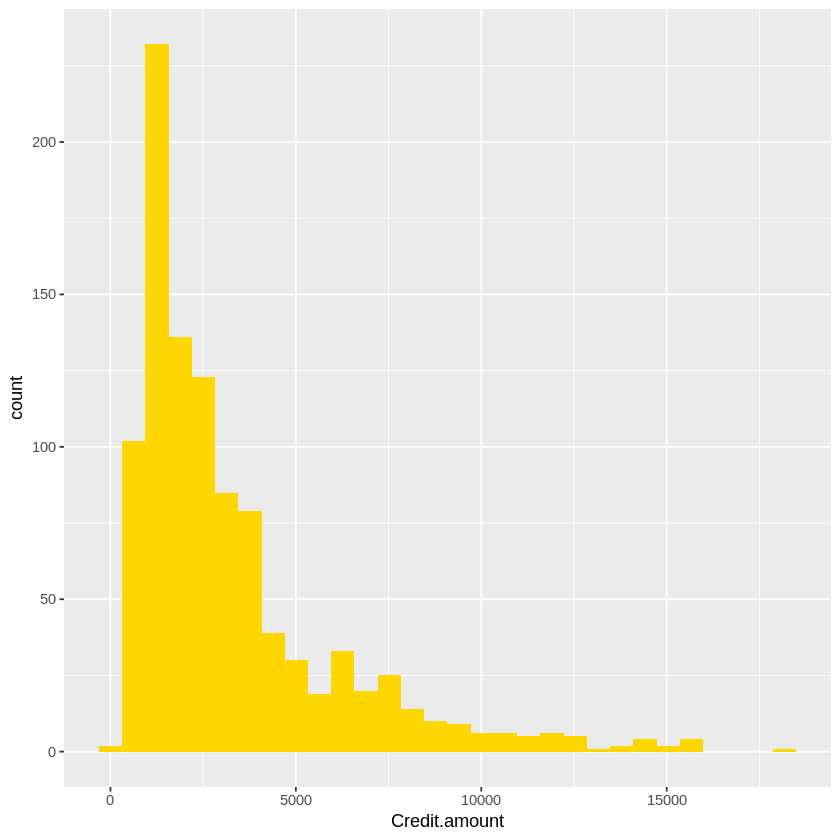

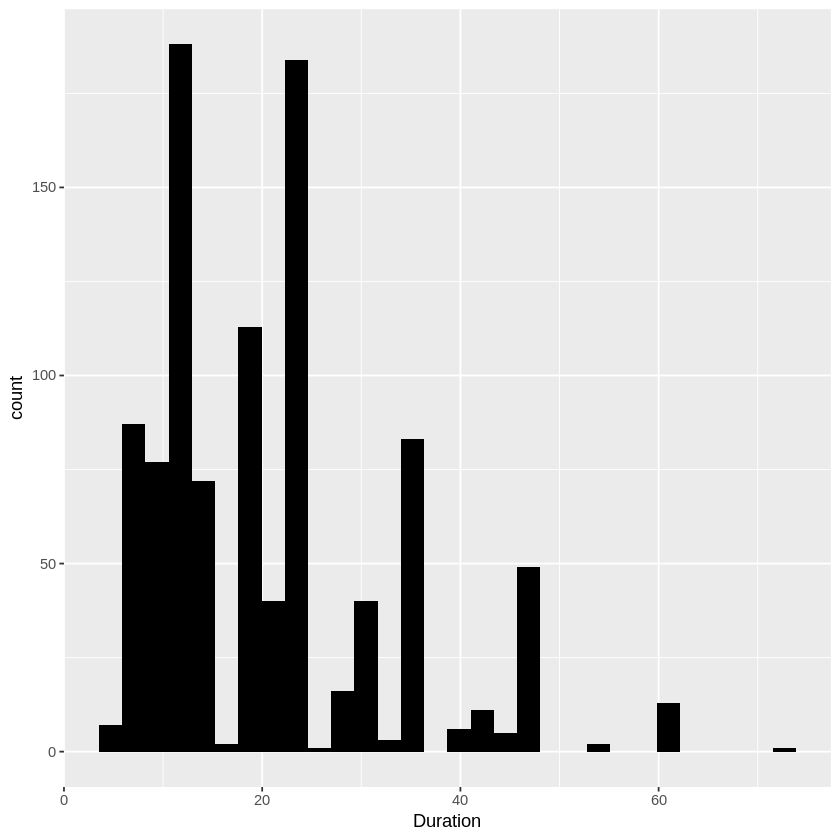

In [13]:

library(ggplot2)

# Age distribution
ggplot(data, aes(x=Age)) + geom_histogram(fill="blue", bins=30)

# Credit.amount distribution
ggplot(data, aes(x=Credit.amount)) + geom_histogram(fill="Gold", bins=30)

# Duration distribution
ggplot(data, aes(x=Duration)) + geom_histogram(fill="black", bins=30)


**BIVARIATE ANALYSIS**

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




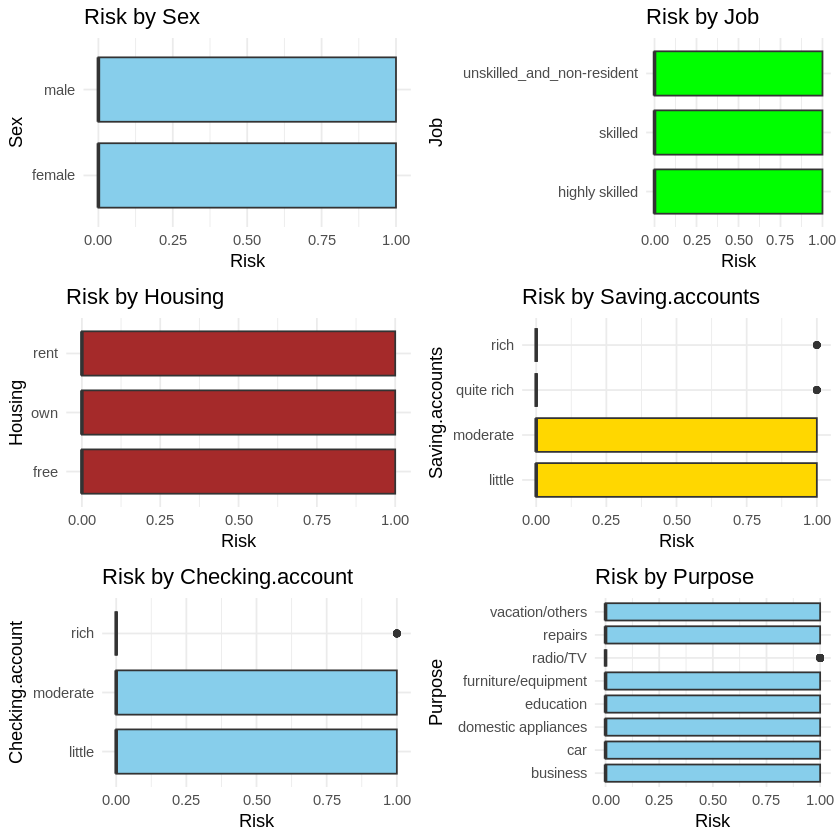

In [14]:
install.packages("gridExtra")
library(ggplot2)
library(gridExtra)


p1 <- ggplot(data, aes(x = Risk, y = Sex)) +
  geom_boxplot(fill = "skyblue") +
  labs(title = "Risk by Sex", x = "Risk", y = "Sex") +
  theme_minimal()

p2 <- ggplot(data, aes(x = Risk, y = Job)) +
  geom_boxplot(fill = "green") +
  labs(title = "Risk by Job", x = "Risk", y = "Job") +
  theme_minimal()

p3 <- ggplot(data, aes(x = Risk, y = Housing)) +
  geom_boxplot(fill = "brown") +
  labs(title = "Risk by Housing", x = "Risk", y = "Housing") +
  theme_minimal()

p4 <- ggplot(data, aes(x = Risk, y = Saving.accounts)) +
  geom_boxplot(fill = "Gold") +
  labs(title = "Risk by Saving.accounts", x = "Risk", y = "Saving.accounts") +
  theme_minimal()

p5 <- ggplot(data, aes(x = Risk, y = Checking.account)) +
  geom_boxplot(fill = "skyblue") +
  labs(title = "Risk by Checking.account", x = "Risk", y = "Checking.account") +
  theme_minimal()

p6 <- ggplot(data, aes(x = Risk, y = Purpose)) +
  geom_boxplot(fill = "skyblue") +
  labs(title = "Risk by Purpose", x = "Risk", y = "Purpose") +
  theme_minimal()

grid.arrange(p1, p2, p3, p4, p5, p6, ncol = 2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.95 loaded




 Shapiro-Wilk test for Age 
Statistic: 0.9174712 
P-value: 6.382098e-23 


 Shapiro-Wilk test for Duration 
Statistic: 0.8997879 
P-value: 4.906432e-25 


 Shapiro-Wilk test for Credit.amount 
Statistic: 0.7933962 
P-value: 8.608546e-34 


 Shapiro-Wilk test for Risk 
Statistic: 0.57561 
P-value: 7.064037e-44 


Spearman correlation between Age and Risk : -0.112191 




Spearman correlation between Duration and Risk : 0.2056846 




Spearman correlation between Credit.amount and Risk : 0.08708308 





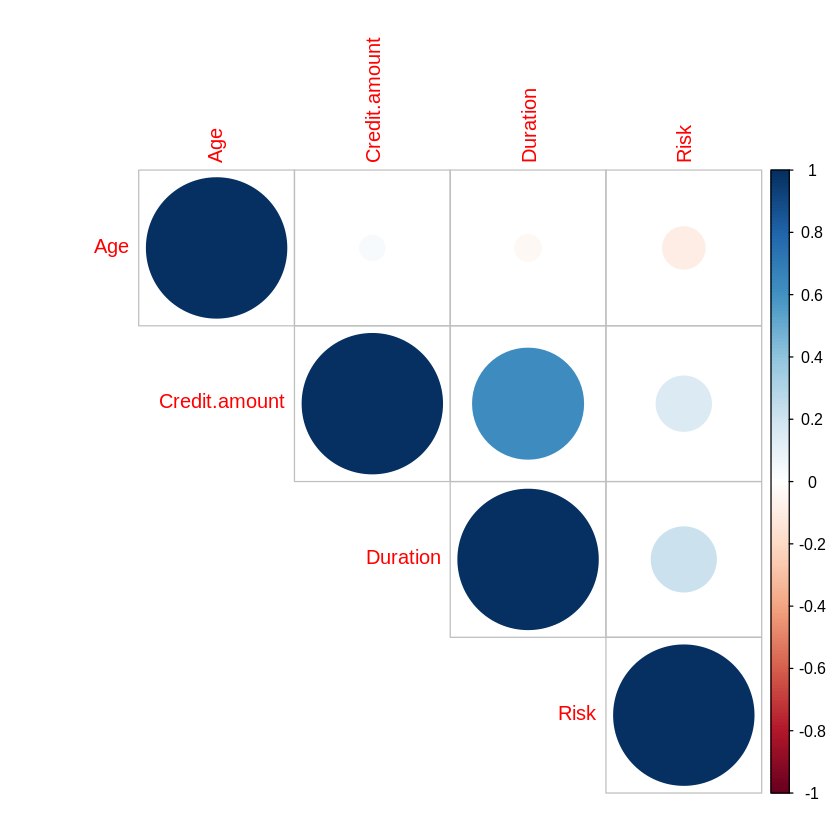

In [15]:
# Load necessary libraries
install.packages("corrplot")
library(corrplot)
library(stats)

# Define variables
variable <- "Age"
variable1 <- "Duration"
variable2 <- "Credit.amount"
t_variable <- "Risk"

# Define the Shapiro-Wilk test function with spacing
shapiro_test <- function(df, var, ct) {
    shapiro_test_result <- shapiro.test(df[[var]])
    cat("\n", ct, "\n")  # Space before the heading
    cat("Statistic:", shapiro_test_result$statistic, "\n")
    cat("P-value:", shapiro_test_result$p.value, "\n")
    cat("\n")  # Space after the test output
}

# Test headings
heading <- "Shapiro-Wilk test for Age"
heading1 <- "Shapiro-Wilk test for Duration"
heading2 <- "Shapiro-Wilk test for Credit.amount"
heading3 <- "Shapiro-Wilk test for Risk"

# Call the Shapiro-Wilk test with spacing
shapiro_test(data, variable, heading)
shapiro_test(data, variable1, heading1)
shapiro_test(data, variable2, heading2)
shapiro_test(data, t_variable, heading3)

# Define the Spearman correlation function with spacing
spearman_correlation <- function(df, cv, tv) {
    # Select numeric columns for correlation
    numeric_df <- df[, sapply(df, is.numeric)]

    # Pearson and Spearman correlations
    # pearson_correlation <- cor(numeric_df[[cv]], numeric_df[[tv]])
    spearman_correlation <- cor(numeric_df[[cv]], numeric_df[[tv]], method = "spearman")

    # Print correlations with spacing
    cat("\nSpearman correlation between", cv, "and", tv, ":", spearman_correlation, "\n")
    # cat("Pearson correlation between", cv, "and", tv, ":", pearson_correlation, "\n")
    cat("\n")  # Space after each correlation output

    # Plot the correlation matrix
    correlation_matrix <- cor(numeric_df)
    corrplot(correlation_matrix, method = "circle", type = "upper")
    cat("\n\n")  # Space after the correlation plot
}

# Call the Spearman correlation with spacing
spearman_correlation(data, "Age", t_variable)
spearman_correlation(data, "Duration", t_variable)
spearman_correlation(data, "Credit.amount", t_variable)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




,Age,Credit.amount,Duration,Risk
Age,1.00000000,0.03271642,-0.03613637,-0.09112741
Credit.amount,0.03271642,1.00000000,0.62498420,0.15473864
Duration,-0.03613637,0.62498420,1.00000000,0.21492667
Risk,-0.09112741,0.15473864,0.21492667,1.00000000


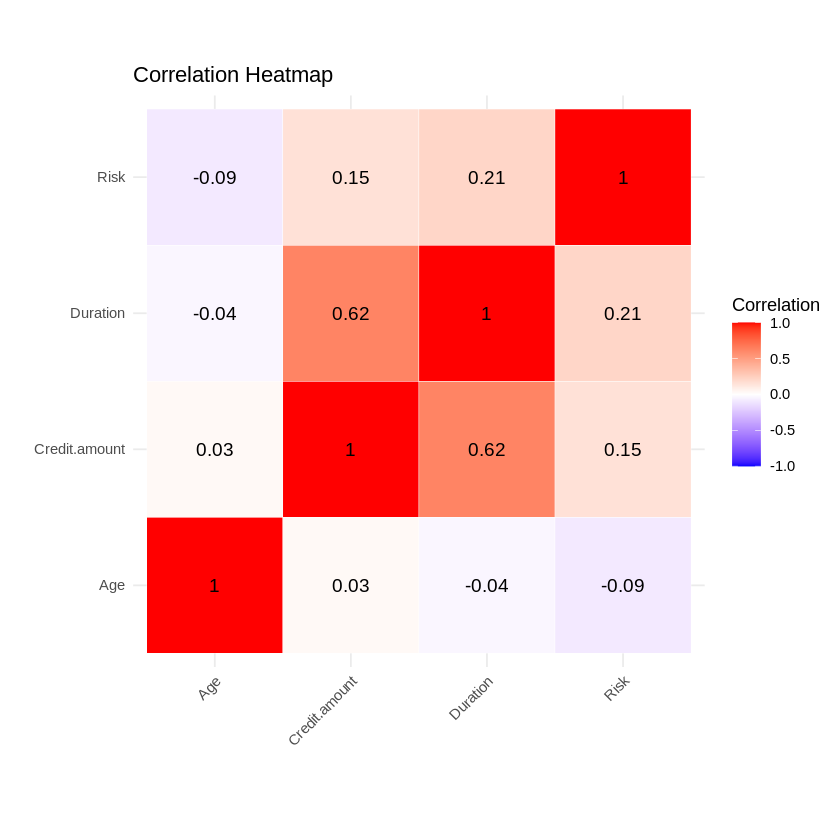

In [16]:
# Load necessary
install.packages("reshape2")
library(ggplot2)
library(reshape2)

# Correlation matrix
cor_matrix <- cor(data[,sapply(data, is.numeric)])
cor_matrix

# Select numeric columns
numeric_data <- data[, c("Age", "Credit.amount", "Duration",
                          "Risk")]

# Visualize the correlation matrix using ggplot2
cor_melted <- melt(cor_matrix)

ggplot(cor_melted, aes(Var1, Var2, fill = value)) +
  geom_tile(color = "white") +
  geom_text(aes(label = round(value, 2)), color = "black", size = 4) +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white",
                       midpoint = 0, limit = c(-1,1), space = "Lab",
                       name="Correlation") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
  coord_fixed() +
  labs(title = "Correlation Heatmap", x = "", y = "")


**MULTIVARIATE ANALYSIS**

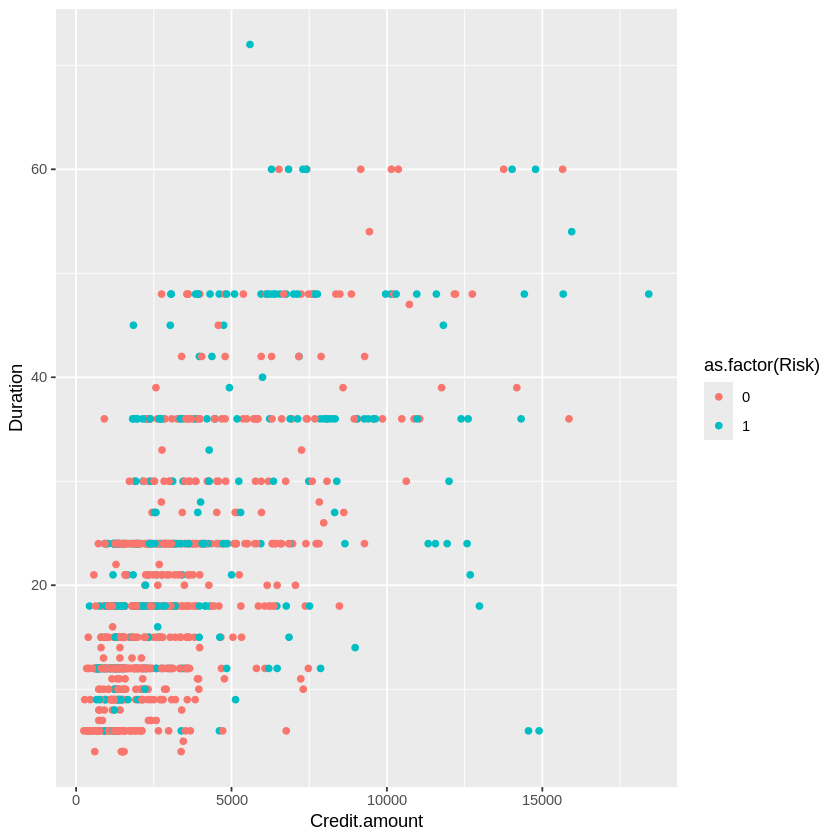

In [17]:
# Credit amount vs Duration
ggplot(data, aes(x=Credit.amount, y=Duration, color=as.factor(Risk))) + geom_point()

In [18]:
# Distribution of target variable
table(data$Risk)


  0   1 
700 300 

**Data Preprocessing**

In [19]:
# Convert categorical variables to factors
data$Sex <- as.factor(data$Sex)
data$Job <- as.factor(data$Job)
data$Housing <- as.factor(data$Housing)
data$Saving.accounts <- as.factor(data$Saving.accounts)
data$Checking.account <- as.factor(data$Checking.account)
data$Purpose <- as.factor(data$Purpose)

In [20]:
# Convert target variable to factor
data$Risk <- as.factor(data$Risk)
unique(data$Risk)
str(data$Risk)


[1] 0 1
Levels: 0 1

 Factor w/ 2 levels "0","1": 1 2 1 1 2 1 1 1 1 2 ...


In [21]:
# One-hot encoding for categorical variables
data <- model.matrix(~., data = data[,-10])[,-1]

In [22]:
data <- as.data.frame(data)
colnames(data)

colnames(data)[colnames(data) == "Risk1"] <- "Risk"
colnames(data)[colnames(data) == "Jobunskilled and non resident"] <- "Jobunskilled_and_non_resident"
colnames(data)[colnames(data) == "Saving.accountsquite rich"] <- "Saving.accountsquiterich"
head(data)

[1] "Age"                           "Sexmale"                      
 [3] "Jobskilled"                    "Jobunskilled_and_non-resident"
 [5] "Housingown"                    "Housingrent"                  
 [7] "Saving.accountsmoderate"       "Saving.accountsquite rich"    
 [9] "Saving.accountsrich"           "Checking.accountmoderate"     
[11] "Checking.accountrich"          "Credit.amount"                
[13] "Duration"                      "Risk1"

,Age,Sexmale,Jobskilled,Jobunskilled_and_non-resident,Housingown,Housingrent,Saving.accountsmoderate,Saving.accountsquiterich,Saving.accountsrich,Checking.accountmoderate,Checking.accountrich,Credit.amount,Duration,Risk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,67,1,1,0,1,0,0,0,0,0,0,1169,6,0
2,22,0,1,0,1,0,0,0,0,1,0,5951,48,1
3,49,1,0,1,1,0,0,0,0,0,0,2096,12,0
4,45,1,1,0,0,0,0,0,0,0,0,7882,42,0
5,53,1,1,0,0,0,0,0,0,0,0,4870,24,1
6,35,1,0,1,0,0,0,0,0,1,0,9055,36,0


In [23]:
install.packages("smotefamily")

# Load the smotefamily package
library(smotefamily)

# Apply SMOTE to address imbalancing
# smote_data <- SMOTE(X = data[, -ncol(data)], target = data$Risk, K = 5)
smote_data <- SMOTE(X = data[, -which(colnames(data) == "Risk")], target = data$Risk, K = 7)
colnames(smote_data$data)[colnames(smote_data$data) == "class"] <- "Risk"


# Check new class distribution
table(smote_data$data$Risk)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘FNN’, ‘dbscan’, ‘igraph’





  0   1 
700 600 

In [24]:
colnames(smote_data$data)

# Convert the Risk column to factor with appropriate labels
smote_data$data$Risk <- factor(smote_data$data$Risk, levels = c(0, 1), labels = c("Low", "High"))

# Check the structure and unique values again
str(smote_data$data$Risk)
unique(smote_data$data$Risk)

[1] "Age"                           "Sexmale"                      
 [3] "Jobskilled"                    "Jobunskilled_and_non-resident"
 [5] "Housingown"                    "Housingrent"                  
 [7] "Saving.accountsmoderate"       "Saving.accountsquiterich"     
 [9] "Saving.accountsrich"           "Checking.accountmoderate"     
[11] "Checking.accountrich"          "Credit.amount"                
[13] "Duration"                      "Risk"

 Factor w/ 2 levels "Low","High": 2 2 2 2 2 2 2 2 2 2 ...


[1] High Low 
Levels: Low High

In [25]:
# Split the data into training and testing set
set.seed(123)
train_index <- sample(1:nrow(smote_data$data), 0.7*nrow(smote_data$data))
train_data <- smote_data$data[train_index,]
test_data <- smote_data$data[-train_index,]

In [26]:
colnames(train_data)
# colnames(train_data)[colnames(train_data) == "Risk1"] <- "Risk"
# colnames(train_data)[colnames(train_data) == "Jobunskilled and non resident"] <- "Jobunskilled_and_non_resident"
# colnames(train_data)[colnames(train_data) == "Saving.accountsquite rich"] <- "Saving.accountsquiterich"
head(train_data)
# sum(is.na(train_data$Jobunskilled_and_non-resident))



[1] "Age"                           "Sexmale"                      
 [3] "Jobskilled"                    "Jobunskilled_and_non-resident"
 [5] "Housingown"                    "Housingrent"                  
 [7] "Saving.accountsmoderate"       "Saving.accountsquiterich"     
 [9] "Saving.accountsrich"           "Checking.accountmoderate"     
[11] "Checking.accountrich"          "Credit.amount"                
[13] "Duration"                      "Risk"

,Age,Sexmale,Jobskilled,Jobunskilled_and_non-resident,Housingown,Housingrent,Saving.accountsmoderate,Saving.accountsquiterich,Saving.accountsrich,Checking.accountmoderate,Checking.accountrich,Credit.amount,Duration,Risk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
415,54.28266,1.0000000,0,0.07992168,0.07992168,0,0,0,0,1,0.0000000,14336.9414,33.60235,High
463,25.23618,0.6273035,1,0.00000000,1.00000000,0,0,0,0,0,0.0000000,905.5904,16.47236,High
179,42.00000,1.0000000,0,0.00000000,0.00000000,0,0,0,0,0,0.0000000,7763.0000,48.00000,High
526,37.21392,1.0000000,0,0.00000000,1.00000000,0,0,0,0,0,0.4643466,1348.2487,17.03480,High
195,37.00000,1.0000000,0,1.00000000,1.00000000,0,0,0,0,0,1.0000000,1344.0000,24.00000,High
938,38.00000,1.0000000,1,0.00000000,1.00000000,0,0,0,0,1,0.0000000,754.0000,12.00000,Low


In [27]:
colnames(test_data)
# colnames(test_data)[colnames(test_data) == "Risk1"] <- "Risk"
# colnames(test_data)[colnames(test_data) == "Jobunskilled and non resident"] <- "Jobunskilled_and_non_resident"
# colnames(test_data)[colnames(test_data) == "Saving.accountsquite rich"] <- "Saving.accountsquiterich"
head(test_data)

[1] "Age"                           "Sexmale"                      
 [3] "Jobskilled"                    "Jobunskilled_and_non-resident"
 [5] "Housingown"                    "Housingrent"                  
 [7] "Saving.accountsmoderate"       "Saving.accountsquiterich"     
 [9] "Saving.accountsrich"           "Checking.accountmoderate"     
[11] "Checking.accountrich"          "Credit.amount"                
[13] "Duration"                      "Risk"

,Age,Sexmale,Jobskilled,Jobunskilled_and_non-resident,Housingown,Housingrent,Saving.accountsmoderate,Saving.accountsquiterich,Saving.accountsrich,Checking.accountmoderate,Checking.accountrich,Credit.amount,Duration,Risk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,36,1,0,1,1,0,0,0,0,1,0,4241,24,High
3,26,0,1,0,1,0,0,0,0,1,0,9960,48,High
4,23,0,1,0,0,1,0,0,0,0,0,7127,36,High
7,31,1,1,0,1,0,0,0,0,0,0,2775,18,High
12,66,1,0,1,1,0,0,1,0,1,0,766,12,High
14,25,1,0,1,0,1,0,0,0,0,0,2210,10,High


**MODEL BUILDING AND EVALUTION**

In [28]:
unique(smote_data$data$Risk)
str(smote_data$data$Risk)

# str(train_data)

[1] High Low 
Levels: Low High

 Factor w/ 2 levels "Low","High": 2 2 2 2 2 2 2 2 2 2 ...


**Logistic Regression Model**

In [29]:

# Install the 'caret' package which contains the 'train' function
install.packages("caret")

# Load the 'caret' package to access the 'train' function
library(caret)

# Train a model (logistic regression) using the training data
model <- train(Risk ~ ., data = train_data, method = "glm")

# Verify the trained model
summary(model)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘pROC’, ‘recipes’


Loading required package: lattice




Call:
NULL

Coefficients:
                                        Estimate Std. Error z value Pr(>|z|)
(Intercept)                            4.716e-01  5.032e-01   0.937 0.348622
Age                                   -2.135e-02  7.449e-03  -2.866 0.004154
Sexmale                               -1.542e-01  1.709e-01  -0.903 0.366713
Jobskilled                            -3.045e-01  2.354e-01  -1.294 0.195722
`\\`Jobunskilled_and_non-resident\\``  1.599e-01  2.726e-01   0.587 0.557429
Housingown                            -5.137e-01  2.578e-01  -1.992 0.046330
Housingrent                            2.028e-01  3.087e-01   0.657 0.511338
Saving.accountsmoderate                2.035e-01  2.559e-01   0.795 0.426385
Saving.accountsquiterich              -4.977e-01  3.518e-01  -1.415 0.157202
Saving.accountsrich                   -9.368e-01  4.373e-01  -2.142 0.032177
Checking.accountmoderate              -6.369e-01  1.685e-01  -3.781 0.000156
Checking.accountrich                  -6.652e-01 

In [30]:
# Use the trained model to make predictions on the test data
predictions <- predict(model, test_data)


In [31]:
# Convert test_data to a data frame
test_data <- as.data.frame(test_data)

# Check if test_data is a data frame
str(test_data)


'data.frame':	391 obs. of  14 variables:
 $ Age                          : num  36 26 23 31 66 25 46 33 37 34 ...
 $ Sexmale                      : num  1 0 0 1 1 1 1 0 0 1 ...
 $ Jobskilled                   : num  0 1 1 1 0 0 1 1 0 0 ...
 $ Jobunskilled_and_non-resident: num  1 0 0 0 1 1 0 0 1 1 ...
 $ Housingown                   : num  1 1 0 1 1 0 0 1 1 0 ...
 $ Housingrent                  : num  0 0 1 0 0 1 0 0 0 0 ...
 $ Saving.accountsmoderate      : num  0 0 0 0 0 0 0 0 0 1 ...
 $ Saving.accountsquiterich     : num  0 0 0 0 1 0 0 0 0 0 ...
 $ Saving.accountsrich          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Checking.accountmoderate     : num  1 1 0 0 1 0 0 0 0 1 ...
 $ Checking.accountrich         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Credit.amount                : num  4241 9960 7127 2775 766 ...
 $ Duration                     : num  24 48 36 18 12 10 48 18 12 48 ...
 $ Risk                         : Factor w/ 2 levels "Low","High": 2 2 2 2 2 2 2 2 2 2 ...


In [32]:
# Check if the 'Risk' column exists in test_data
if ("Risk" %in% colnames(test_data)) {
    print("Risk column exists.")
} else {
    print("Risk column not found.")
}


# Convert predictions and test_data$Risk to factors with the same levels
predictions <- as.factor(predictions)
test_data$Risk <- as.factor(test_data$Risk)

# Ensure predictions and test_data$Risk have the same levels
common_levels <- unique(c(levels(predictions), levels(test_data$Risk)))

# Set the levels of both factors to the common levels
levels(predictions) <- common_levels
levels(test_data$Risk) <- common_levels



[1] "Risk column exists."


**Logistic Regression Hyperparameter Tuning And Performance**

In [33]:
colnames(test_data)
colnames(train_data)

#Change the column name 'Jobunskilled_and_non-resident'
colnames(test_data) <- gsub("-", "_", colnames(test_data))
colnames(train_data) <- gsub("-", "_", colnames(train_data))

# Verify the column name has been changed
print(colnames(test_data))
print(colnames(train_data))

[1] "Age"                           "Sexmale"                      
 [3] "Jobskilled"                    "Jobunskilled_and_non-resident"
 [5] "Housingown"                    "Housingrent"                  
 [7] "Saving.accountsmoderate"       "Saving.accountsquiterich"     
 [9] "Saving.accountsrich"           "Checking.accountmoderate"     
[11] "Checking.accountrich"          "Credit.amount"                
[13] "Duration"                      "Risk"

[1] "Age"                           "Sexmale"                      
 [3] "Jobskilled"                    "Jobunskilled_and_non-resident"
 [5] "Housingown"                    "Housingrent"                  
 [7] "Saving.accountsmoderate"       "Saving.accountsquiterich"     
 [9] "Saving.accountsrich"           "Checking.accountmoderate"     
[11] "Checking.accountrich"          "Credit.amount"                
[13] "Duration"                      "Risk"

 [1] "Age"                           "Sexmale"                      
 [3] "Jobskilled"                    "Jobunskilled_and_non_resident"
 [5] "Housingown"                    "Housingrent"                  
 [7] "Saving.accountsmoderate"       "Saving.accountsquiterich"     
 [9] "Saving.accountsrich"           "Checking.accountmoderate"     
[11] "Checking.accountrich"          "Credit.amount"                
[13] "Duration"                      "Risk"                         
 [1] "Age"                           "Sexmale"                      
 [3] "Jobskilled"                    "Jobunskilled_and_non_resident"
 [5] "Housingown"                    "Housingrent"                  
 [7] "Saving.accountsmoderate"       "Saving.accountsquiterich"     
 [9] "Saving.accountsrich"           "Checking.accountmoderate"     
[11] "Checking.accountrich"          "Credit.amount"                
[13] "Duration"                      "Risk"                         


In [34]:
install.packages("caret")
install.packages("glmnet")
library(caret)
library(glmnet)

# Normalizing the data before training the model
pre_process <- preProcess(train_data, method = c("center", "scale"))
train_data_norm <- predict(pre_process, train_data)
test_data_norm <- predict(pre_process, test_data)

# Define the logistic regression model with L1 (lasso) or L2 (ridge) penalties
set.seed(123)
logreg_ctrl <- trainControl(method = "cv", number = 5)

# Define the grid of hyperparameters to search
logreg_grid <- expand.grid(
  alpha = seq(0, 1, by = 0.25),   # alpha = 0 (ridge), alpha = 1 (lasso)
  lambda = seq(0.0001, 0.1, by = 0.005)  # Regularization strength (lambda)
)

# Train the model using grid search
logreg_model <- train(
  Risk ~ .,  # Replace `Risk` with your target variable
  data = train_data_norm,  # Use your training dataset here
  method = "glmnet",
  trControl = logreg_ctrl,
  tuneGrid = logreg_grid
)

# Get the best hyperparameters
print(logreg_model$bestTune)

# Make predictions and evaluate
pred_logreg <- predict(logreg_model, newdata = test_data_norm)

# Convert predictions and test_data$Risk to factors with the same levels
all_levels <- unique(c(as.character(pred_logreg), as.character(test_data$Risk)))


# Convert both to factors with all_levels
pred_logreg <- factor(pred_logreg, levels = all_levels)
test_data$Risk <- factor(test_data$Risk, levels = all_levels)


# Compute confusion matrix directly
confusion_matrix <- confusionMatrix(pred_logreg, test_data$Risk)

# Extract metrics
accuracy <- confusion_matrix$overall["Accuracy"]
precision <- confusion_matrix$byClass["Pos Pred Value"]  # Precision
recall <- confusion_matrix$byClass["Sensitivity"]  # Recall
f1_score <- confusion_matrix$byClass["F1"]

# Print the metrics
cat("Accuracy:", accuracy, "\n")
cat("Precision:", precision, "\n")
cat("Recall:", recall, "\n")
cat("F1-score:", f1_score, "\n")




Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘RcppEigen’


Loading required package: Matrix

Loaded glmnet 4.1-8



   alpha lambda
10     0 0.0451
Accuracy: 0.6035806 
Precision: 0.6244726 
Recall: 0.6915888 
F1-score: 0.6563193 


**Decision Tree Model**

In [35]:
## Load the necessary library for decision trees
library(rpart)

# Convert train_data to a data frame if it's not already
train_data <- as.data.frame(train_data)

# Train a decision tree model using the training data
decision_tree_model <- rpart(Risk ~ ., data = train_data, method = "class")

# Check the decision tree model
print(decision_tree_model)


n= 909 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 909 423 Low (0.53465347 0.46534653)  
    2) Housingown>=0.996257 573 209 Low (0.63525305 0.36474695)  
      4) Credit.amount< 6332 506 164 Low (0.67588933 0.32411067)  
        8) Duration< 6.252713 41   1 Low (0.97560976 0.02439024) *
        9) Duration>=6.252713 465 163 Low (0.64946237 0.35053763)  
         18) Jobskilled>=0.9933034 296  81 Low (0.72635135 0.27364865) *
         19) Jobskilled< 0.9933034 169  82 Low (0.51479290 0.48520710)  
           38) Jobskilled< 0.008245242 132  45 Low (0.65909091 0.34090909)  
             76) Credit.amount>=1006.5 112  32 Low (0.71428571 0.28571429) *
             77) Credit.amount< 1006.5 20   7 High (0.35000000 0.65000000) *
           39) Jobskilled>=0.008245242 37   0 High (0.00000000 1.00000000) *
      5) Credit.amount>=6332 67  22 High (0.32835821 0.67164179) *
    3) Housingown< 0.996257 336 122 High (0.36309524 0.63690476)  
      6) Housingown

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



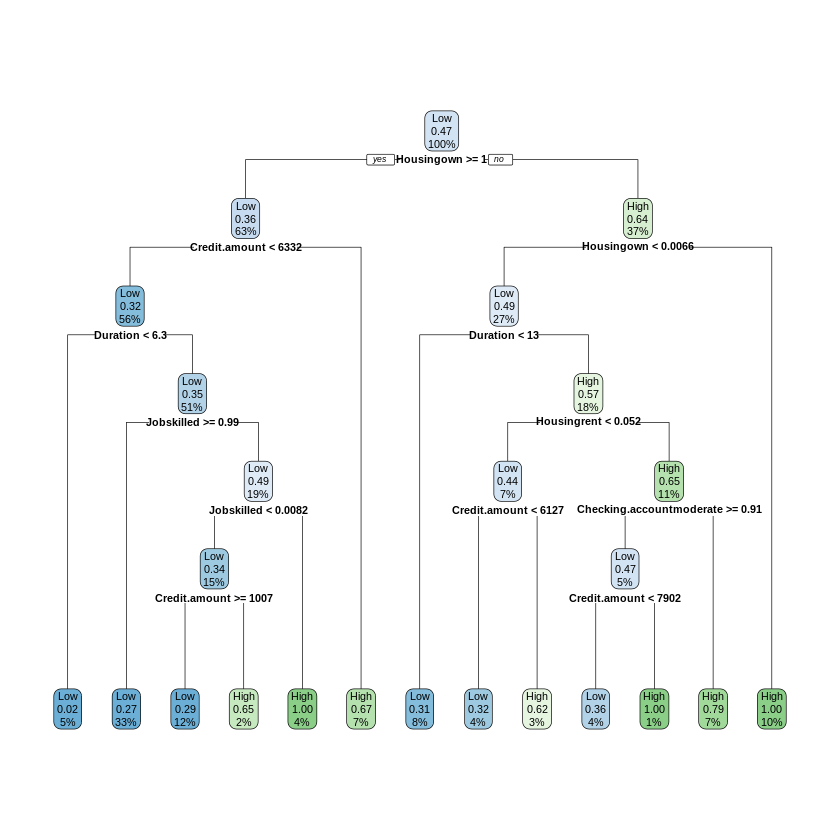

In [36]:
# Visualize the decision tree
install.packages("rpart.plot")
library(rpart.plot)
rpart.plot(decision_tree_model)

In [37]:
# Make predictions on the test data using the decision tree
decision_tree_predictions <- predict(decision_tree_model, test_data, type = "class")

**Decision Tree Performance**

In [38]:
# Load the library for evaluation metrics
library(caret)

# Create a confusion matrix to evaluate the decision tree model
dc <- confusionMatrix(decision_tree_predictions, test_data$Risk)
dc


Confusion Matrix and Statistics

          Reference
Prediction Low High
      Low  165   79
      High  49   98
                                         
               Accuracy : 0.6726         
                 95% CI : (0.6237, 0.719)
    No Information Rate : 0.5473         
    P-Value [Acc > NIR] : 2.987e-07      
                                         
                  Kappa : 0.3295         
                                         
 Mcnemar's Test P-Value : 0.01037        
                                         
            Sensitivity : 0.7710         
            Specificity : 0.5537         
         Pos Pred Value : 0.6762         
         Neg Pred Value : 0.6667         
             Prevalence : 0.5473         
         Detection Rate : 0.4220         
   Detection Prevalence : 0.6240         
      Balanced Accuracy : 0.6624         
                                         
       'Positive' Class : Low            
                                         

**Decision Tree Hyperparameter Tuning And Performance**

In [39]:
# Install the required libraries
install.packages("rpart")
library(rpart)

# Define the decision tree control for cross-validation
set.seed(123)
dtree_ctrl <- trainControl(method = "cv", number = 10)

# Define the grid of hyperparameters to search
dtree_grid <- expand.grid(
  cp = seq(0.001, 0.05, by = 0.005)  # Complexity parameter (pruning)
)

# Train the model using grid search
dtree_model <- train(
  Risk ~ .,
  data = train_data,
  method = "rpart",
  trControl = dtree_ctrl,
  tuneGrid = dtree_grid
)

# Get the best hyperparameters
print(dtree_model$bestTune)

# Make predictions and evaluate
pred_dtree <- predict(dtree_model, newdata = test_data)
confusionMatrix(pred_dtree, test_data$Risk)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



     cp
2 0.006


Confusion Matrix and Statistics

          Reference
Prediction Low High
      Low  164   73
      High  50  104
                                          
               Accuracy : 0.6854          
                 95% CI : (0.6368, 0.7312)
    No Information Rate : 0.5473          
    P-Value [Acc > NIR] : 1.71e-08        
                                          
                  Kappa : 0.3579          
                                          
 Mcnemar's Test P-Value : 0.04729         
                                          
            Sensitivity : 0.7664          
            Specificity : 0.5876          
         Pos Pred Value : 0.6920          
         Neg Pred Value : 0.6753          
             Prevalence : 0.5473          
         Detection Rate : 0.4194          
   Detection Prevalence : 0.6061          
      Balanced Accuracy : 0.6770          
                                          
       'Positive' Class : Low             
                           

**Random Forest Model**

In [40]:
colnames(train_data)

# Check levels of the 'Job' or similar column to see if 'Jobunskilled_and_non-resident' is present
# levels(train_data$'Jobunskilled_and_non-resident')
# Replace hyphen with underscore in the column name
colnames(train_data) <- gsub("-", "_", colnames(train_data))

# Verify the column name has been changed
print(colnames(train_data))


[1] "Age"                           "Sexmale"                      
 [3] "Jobskilled"                    "Jobunskilled_and_non_resident"
 [5] "Housingown"                    "Housingrent"                  
 [7] "Saving.accountsmoderate"       "Saving.accountsquiterich"     
 [9] "Saving.accountsrich"           "Checking.accountmoderate"     
[11] "Checking.accountrich"          "Credit.amount"                
[13] "Duration"                      "Risk"

 [1] "Age"                           "Sexmale"                      
 [3] "Jobskilled"                    "Jobunskilled_and_non_resident"
 [5] "Housingown"                    "Housingrent"                  
 [7] "Saving.accountsmoderate"       "Saving.accountsquiterich"     
 [9] "Saving.accountsrich"           "Checking.accountmoderate"     
[11] "Checking.accountrich"          "Credit.amount"                
[13] "Duration"                      "Risk"                         


In [41]:
install.packages("randomForest")
library(randomForest)

rf_model <- randomForest(Risk ~ ., data = train_data, ntree = 100, mtry = 2, importance = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:gridExtra’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine




In [42]:
colnames(train_data)


[1] "Age"                           "Sexmale"                      
 [3] "Jobskilled"                    "Jobunskilled_and_non_resident"
 [5] "Housingown"                    "Housingrent"                  
 [7] "Saving.accountsmoderate"       "Saving.accountsquiterich"     
 [9] "Saving.accountsrich"           "Checking.accountmoderate"     
[11] "Checking.accountrich"          "Credit.amount"                
[13] "Duration"                      "Risk"

**Random Forest Performance**

In [43]:
# Confusion matrix to evaluate accuracy
confusion_matrix <- table(test_data$Risk, predictions)
print(confusion_matrix)



      predictions
       Low High
  Low  143   71
  High  87   90


In [44]:
# Calculate accuracy
accuracy <- sum(diag(confusion_matrix)) / sum(confusion_matrix)
cat("Accuracy:", accuracy, "\n")

Accuracy: 0.5959079 


,Low,High,MeanDecreaseAccuracy,MeanDecreaseGini
Age,2.7456455,3.494346,4.321343,35.830159
Sexmale,4.2455269,6.010439,6.719797,16.672146
Jobskilled,10.2766725,7.483929,12.363181,26.465154
Jobunskilled_and_non_resident,7.7432094,3.981076,8.861882,12.881641
Housingown,10.4311609,3.300308,10.739111,25.975334
Housingrent,6.6021948,2.273291,8.439923,15.560738
Saving.accountsmoderate,3.1754160,3.549458,4.747461,7.175631
Saving.accountsquiterich,-0.8315715,2.895382,1.105320,4.783115
Saving.accountsrich,2.2638209,5.174471,4.523239,4.893750
Checking.accountmoderate,9.4756852,9.818900,12.518353,25.045776


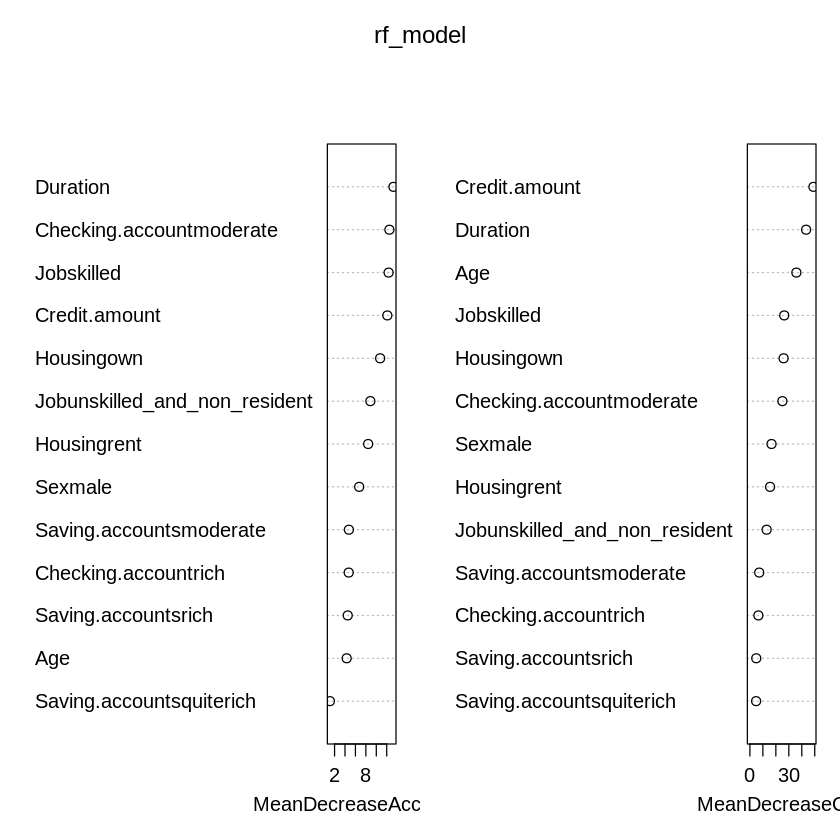

In [45]:
# Variable importance
importance(rf_model)
varImpPlot(rf_model)


**Random Forest Hyperparameter Tuning And Performance**

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



  mtry
3    4
Confusion Matrix and Statistics

          Reference
Prediction Low High
      Low  185   75
      High  29  102
                                          
               Accuracy : 0.734           
                 95% CI : (0.6873, 0.7772)
    No Information Rate : 0.5473          
    P-Value [Acc > NIR] : 2.185e-14       
                                          
                  Kappa : 0.4509          
                                          
 Mcnemar's Test P-Value : 1.021e-05       
                                          
            Sensitivity : 0.8645          
            Specificity : 0.5763          
         Pos Pred Value : 0.7115          
         Neg Pred Value : 0.7786          
             Prevalence : 0.5473          
         Detection Rate : 0.4731          
   Detection Prevalence : 0.6650          
      Balanced Accuracy : 0.7204          
                                          
       'Positive' Class : Low             
             

,MeanDecreaseGini
Age,68.244812
Sexmale,22.433323
Jobskilled,26.349046
Jobunskilled_and_non_resident,13.699894
Housingown,30.156649
Housingrent,19.141047
Saving.accountsmoderate,9.154103
Saving.accountsquiterich,6.195070
Saving.accountsrich,5.335306
Checking.accountmoderate,35.633864


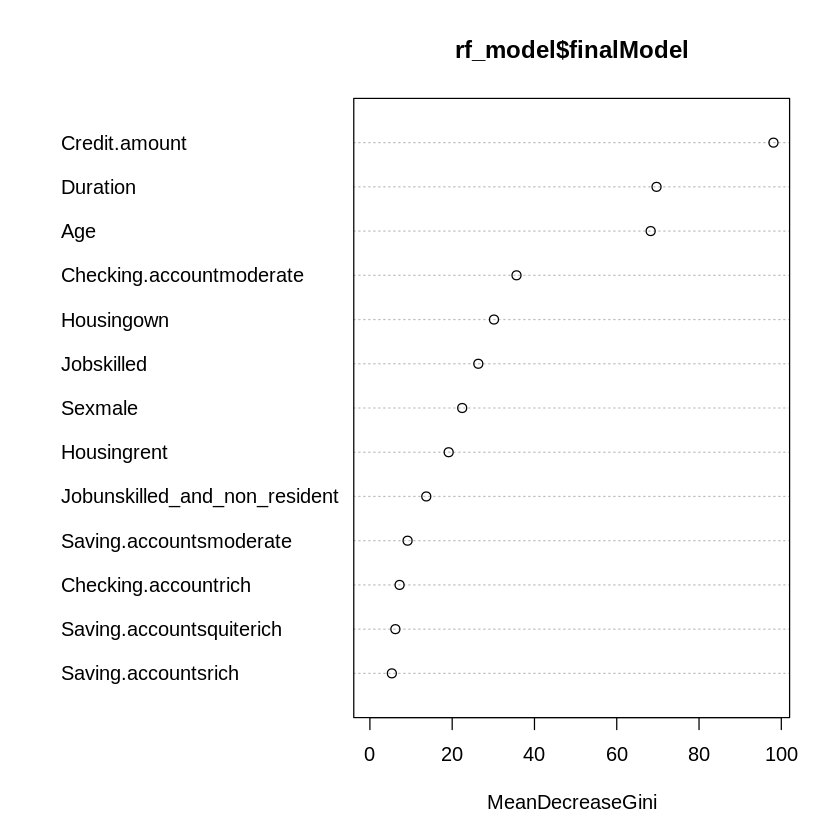

In [46]:
# Install the required libraries
install.packages("randomForest")
install.packages("caret")
library(randomForest)
library(caret)

# Define the random forest control for cross-validation
set.seed(123)
rf_ctrl <- trainControl(method = "cv", number = 5)

# Define the grid of hyperparameters to search
# Grid only includes 'mtry' as Random Forest tuning grid focuses on 'mtry'
rf_grid <- expand.grid(
  mtry = c(2, 3, 4)

)

# Train the model using grid search
rf_model <- train(
  Risk ~ .,
  data = train_data,
  method = "rf",
  trControl = rf_ctrl,
  tuneGrid = rf_grid,
  ntree = 500
)

# Get the best hyperparameters
print(rf_model$bestTune)

# Make predictions and evaluate
pred_rf <- predict(rf_model, newdata = test_data)

# Confusion Matrix to evaluate accuracy
confusion_matrix <- confusionMatrix(pred_rf, test_data$Risk)
print(confusion_matrix)

#Variable importance
importance(rf_model$finalModel)
varImpPlot(rf_model$finalModel)

